<a href="https://colab.research.google.com/github/dcolinmorgan/grph/blob/main/standard_single_cell_umap_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Computational challenges of cell cycle analysis using single cell transcriptomics](https://arxiv.org/pdf/2208.05229.pdf)

#### [data from stanford cytotrace](https://cytotrace.stanford.edu/#shiny-tab-dataset_downloadhttps://cytotrace.stanford.edu/#shiny-tab-dataset_download)
#### [and here](https://www.kaggle.com/code/dcolin/scanpy-scrnaseq/datahttps://www.kaggle.com/code/dcolin/scanpy-scrnaseq/data)

## [GPU version here](https://colab.research.google.com/drive/1Vr4CbnUS6Gj0wZi6c9MEKiSvvOMz5kiQ#scrollTo=cc6f3beb-13c9-4d11-b8b2-35676f711f50) for benchmark comparison

In [ ]:
# !pip install squarify
!pip install scanpy
# !git clone https://github.com/dcolinmorgan/cuCat.git
# !git clone https://github.com/graphistry/pygraphistry.git
# !git clone https://github.com/dirty-cat/dirty_cat.git

import scanpy as sc
import anndata

In [ ]:
#download 5 single cell datasets
%%bash
wget https://www.dropbox.com/s/xza477kxj7vgdlr/GSE67123_6.h5ad.zip
wget https://www.dropbox.com/s/9r2f3bz4jss9vvr/GSE74767_2.h5ad.zip
wget https://www.dropbox.com/s/thhiv9va2415x6d/GSE97391_27.h5ad.zip
wget https://www.dropbox.com/s/sl76p7hydt40wnv/GSE98664_20.h5ad.zip
wget https://www.dropbox.com/s/i7lyxxa9td2gpmv/GSE97391_22.h5ad.zip
unzip GSE67123_6.h5ad.zip
unzip GSE74767_2.h5ad.zip
unzip GSE97391_27.h5ad.zip
unzip GSE98664_20.h5ad.zip
unzip GSE97391_22.h5ad.zip

In [3]:
!mkdir single_cell
!mv *.h5ad single_cell

In [4]:
import os, time
from collections import Counter
import cProfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pstats import Stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 200)


### dataset descriptions (last one is largest)

In [5]:

list_files = []
for dirname, _, filenames in os.walk('single_cell'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        list_files.append(os.path.join(dirname, filename))

for fn in list_files:
    adata = sc.read(fn) # sc.read_h5ad
    print( adata.uns['info'] )
    print()

['Direct in vitro neuron (inDrop)' 'Validation' '2684' 'nan' 'nan' '2366'
 '28205' '4' '4' 'UMI' 'Mouse' '1' 'Brain' 'inDrop' 'Phenotypes'
 'in vitro' '28990928' '20171009' 'GSE97391' 'Elife'
 'Cell types involved in neuronal differentiation as highlighted with dashed boundaries in Figure 2 of the original study were assigned ranks based on known differentiation status. ']

['Embryonic HSCs (Tang et al.)' 'Validation' '143' 'nan' 'nan' '143'
 '24028' '5' '5' 'TPM/FPKM' 'Mouse' '1' 'Embryo' 'Tang et al.'
 'Timepoints' 'in vivo' '27225119' '20160526' 'GSE67123' 'Nature' 'nan']

['Standard in vitro neuron (inDrop)' 'Validation' '2996' 'nan' 'nan'
 '2411' '28205' '7' '7' 'UMI' 'Mouse' '1' 'Brain' 'inDrop' 'Phenotypes'
 'in vitro' '28990928' '20171009' 'GSE97391' 'Elife'
 'Cell types involved in neuronal differentiation as highlighted with dashed boundaries in Figure 2 of the original study were assigned ranks based on known differentiation status. ']

['Blastocyst timepoints (SC3-seq)' 'Va

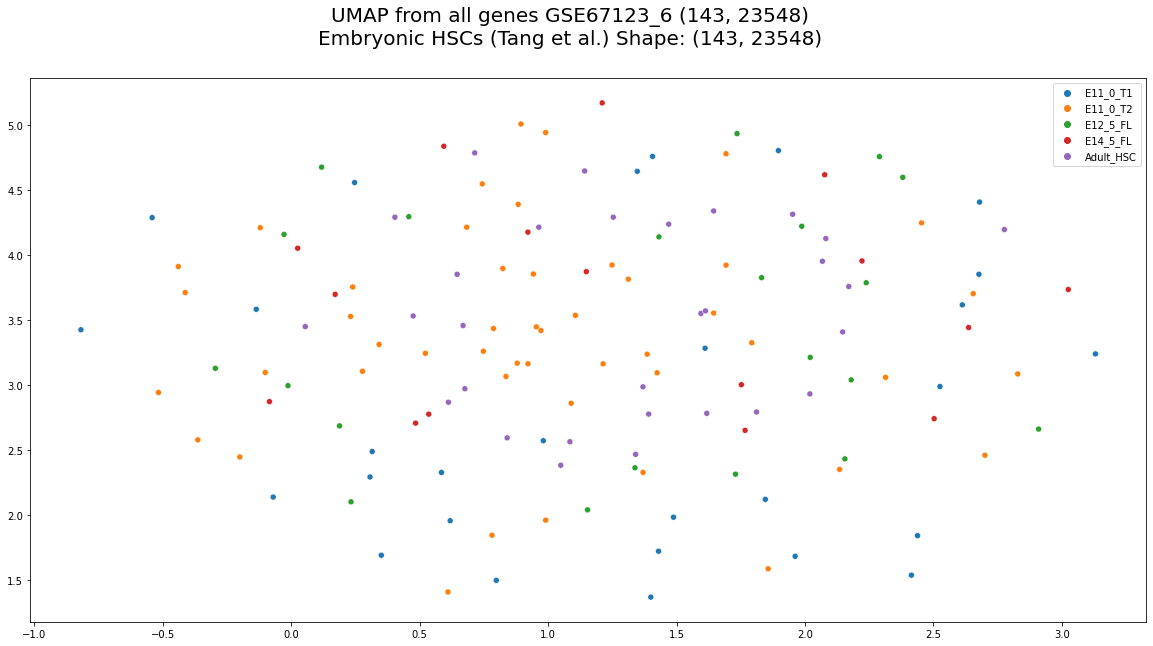

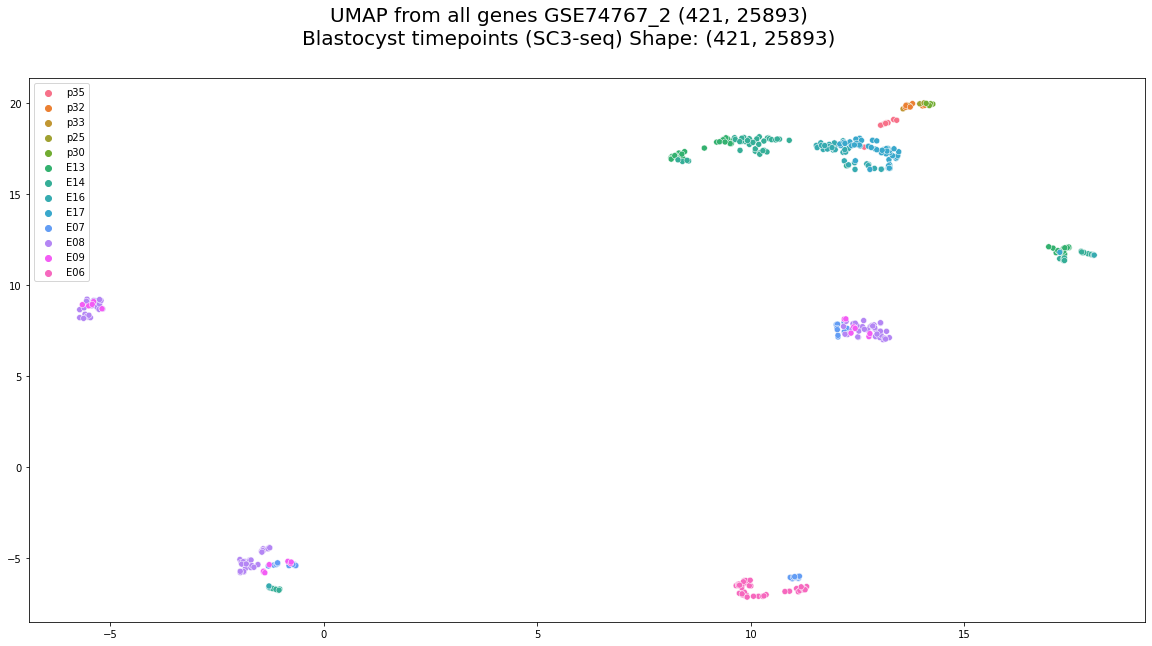

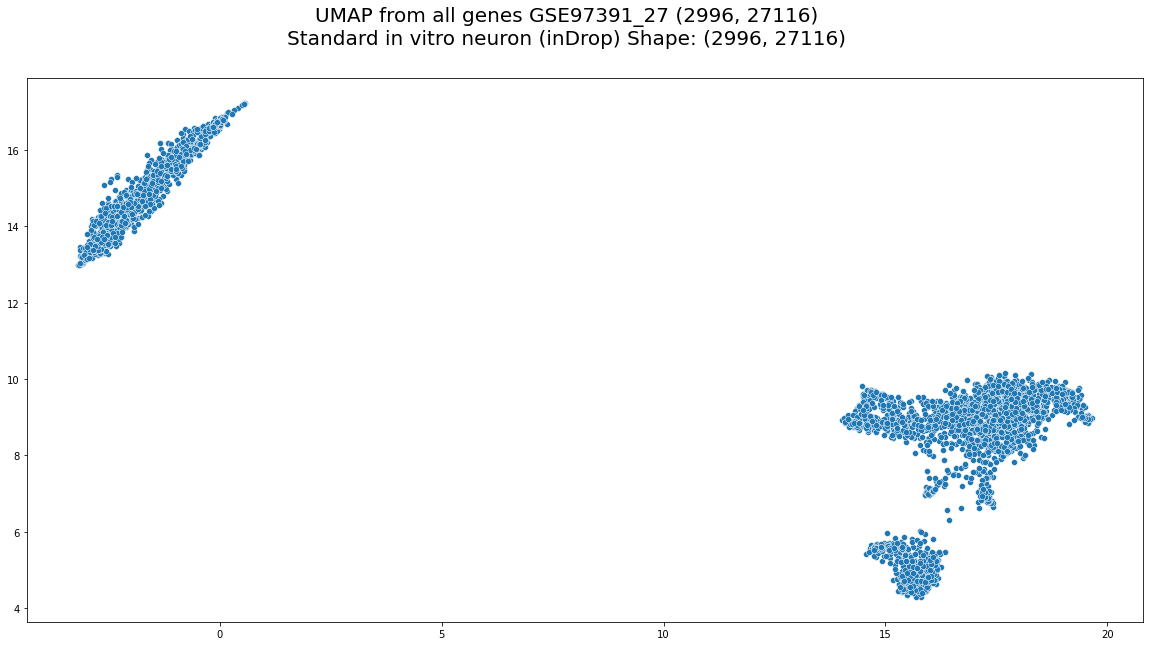

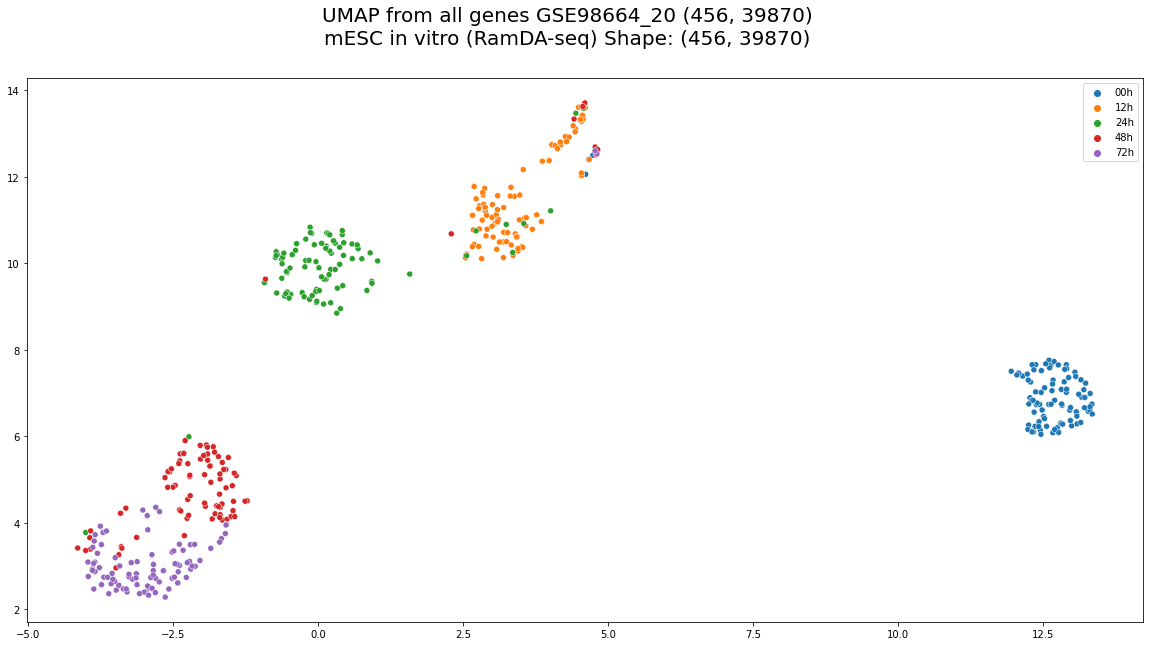

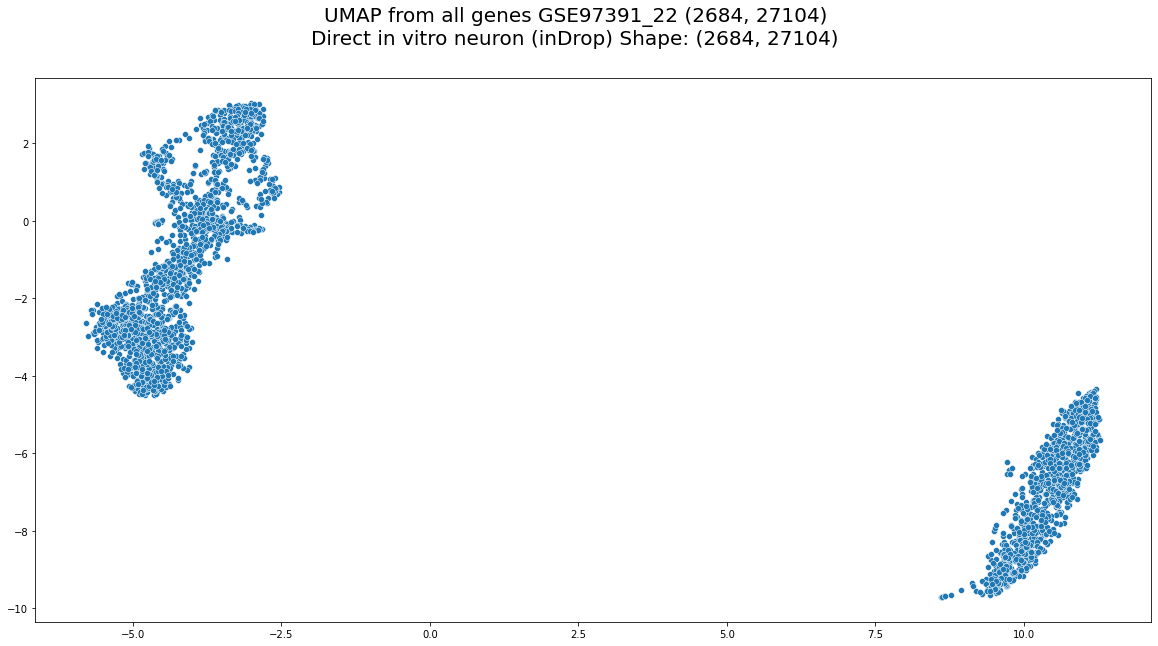

Total  152.6 seconds passed


In [6]:
import time, umap
t0 = time.time()
fn='single_cell/GSE67123_6.h5ad'
adata1 = sc.read(fn) # sc.read_h5ad
str_data_inf_1 = fn.split('/')[1].split('.')[0] + ' ' + str(adata1.X.shape)+'\n' + adata1.uns['info'][0]

reducer = umap.UMAP()
r1 = reducer.fit_transform(adata1.X)

fig = plt.figure(figsize = (20,10)); c = 0
plt.suptitle('UMAP from all genes ' +str_data_inf_1 + ' Shape: ' + str(adata1.X.shape) , fontsize = 20  )
sns.scatterplot(x = r1[:,0], y = r1[:,1]  , hue = adata1.uns['Phenotype'])
plt.show()

fn='single_cell/GSE74767_2.h5ad'
adata2 = sc.read(fn) # sc.read_h5ad
str_data_inf_2 = fn.split('/')[1].split('.')[0] + ' ' + str(adata2.X.shape)+'\n' + adata2.uns['info'][0]

reducer = umap.UMAP(n_components=2)
r2 = reducer.fit_transform(adata2.X)

fig = plt.figure(figsize = (20,10)); c = 0
plt.suptitle('UMAP from all genes ' +str_data_inf_2 + ' Shape: ' + str(adata2.X.shape) , fontsize = 20  )
sns.scatterplot(x = r2[:,0], y = r2[:,1]  , hue = adata2.uns['Phenotype'])
plt.show()

fn='single_cell/GSE97391_27.h5ad'
adata3 = sc.read(fn) # sc.read_h5ad
str_data_inf_3 = fn.split('/')[1].split('.')[0] + ' ' + str(adata3.X.shape)+'\n' + adata3.uns['info'][0]

reducer = umap.UMAP(n_components=2)
r3 = reducer.fit_transform(adata3.X)

fig = plt.figure(figsize = (20,10)); c = 0
plt.suptitle('UMAP from all genes ' +str_data_inf_3 + ' Shape: ' + str(adata3.X.shape) , fontsize = 20  )
sns.scatterplot(x = r3[:,0], y = r3[:,1] )# , hue = adata3.uns['Phenotype'])
plt.show()

fn='single_cell/GSE98664_20.h5ad'
adata4 = sc.read(fn) # sc.read_h5ad
str_data_inf_4 = fn.split('/')[1].split('.')[0] + ' ' + str(adata4.X.shape)+'\n' + adata4.uns['info'][0]

reducer = umap.UMAP(n_components=2)
r4 = reducer.fit_transform(adata4.X)

fig = plt.figure(figsize = (20,10)); c = 0
plt.suptitle('UMAP from all genes ' +str_data_inf_4 + ' Shape: ' + str(adata4.X.shape) , fontsize = 20  )
sns.scatterplot(x = r4[:,0], y = r4[:,1]  , hue = adata4.uns['Phenotype'])
plt.show()

fn='single_cell/GSE97391_22.h5ad'
adata5 = sc.read(fn) # sc.read_h5ad
str_data_inf_5 = fn.split('/')[1].split('.')[0] + ' ' + str(adata5.X.shape)+'\n' + adata5.uns['info'][0]

reducer = umap.UMAP(n_components=2)
r5 = reducer.fit_transform(adata5.X)

fig = plt.figure(figsize = (20,10)); c = 0
plt.suptitle('UMAP from all genes ' +str_data_inf_5 + ' Shape: ' + str(adata5.X.shape) , fontsize = 20  )
sns.scatterplot(x = r5[:,0], y = r5[:,1] )#  , hue = adata5.uns['Phenotype'])
plt.show()


print('Total ', np.round(time.time() - t0,1), 'seconds passed')


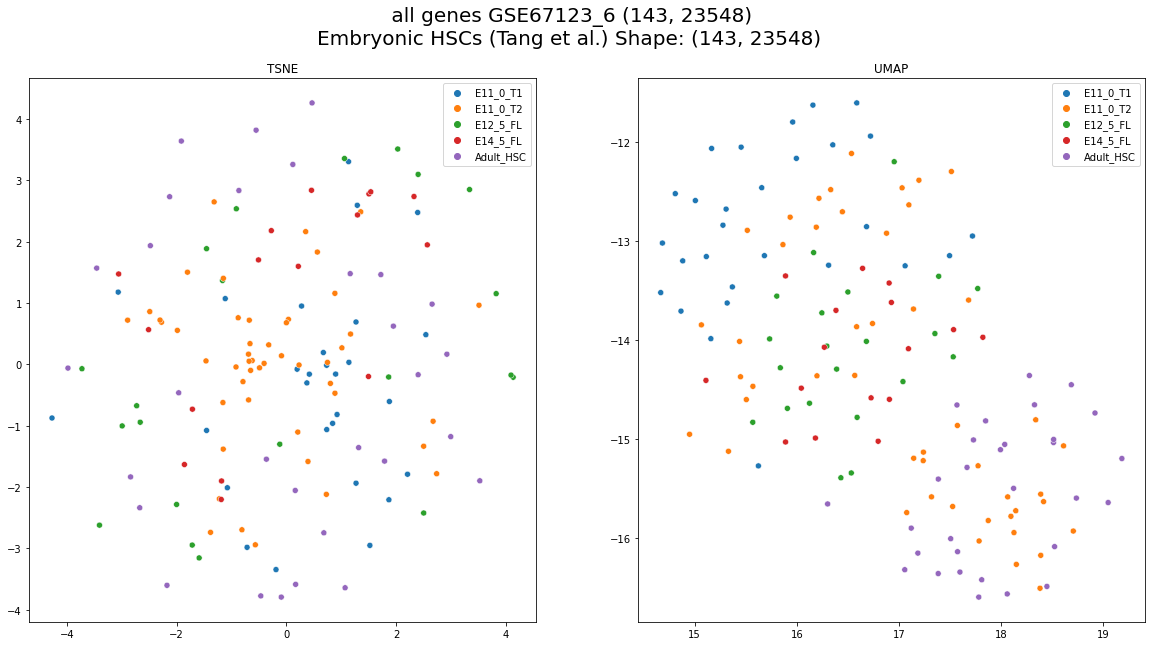

In [9]:
fig,ax = plt.subplots(1,2, figsize = (20,10)); c = 0
ax[0].set_title('TSNE')
ax[1].set_title('UMAP')
plt.suptitle(' all genes ' +str_data_inf_1 + ' Shape: ' + str(adata1.X.shape) , fontsize = 20  )

sns.scatterplot(x = adata1.uns['X_tsne'][:,0], y = adata1.uns['X_tsne'][:,1]  , hue = adata1.uns['Phenotype'],ax=ax[0])

sns.scatterplot(x = adata1.uns['X_umap'][:,0], y = adata1.uns['X_umap'][:,1]  , hue = adata1.uns['Phenotype'],ax=ax[1])

plt.show()